### How normal are you? Checking distributional assumptions ###

The need to understand the underlying distribution of data is critical in most parts of quantitative finance. Statistical tests can be applied for this purpose.

The assumption of a normal distribution is commonplace, so let's start with simple tests to check whether data follows a normal distribution.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from scipy import stats

# Create a normal distribution
np.random.seed(42)
mean = 1.2
std = 0.3
n = 10000

returns = np.random.normal(mean, std, n)

In [3]:
# Shapiro-Wilk test for normality
# See here for more details https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.shapiro.html

print('Test stat: ', stats.shapiro(returns)[0], 
      'p value: ', stats.shapiro(returns)[1])

Test stat:  0.9999347925186157 p value:  0.9987024664878845


The confidence level for the Shapiro-Wilk test is 95% and the null hypothesis is that returns follows a normal distribution. Since the P-value >> 0.05 (i.e. 5%), we accept the hypothesis that the returns follow a normal distribution

In [4]:
# let's create another distribution, this time an exponential one

returns_exp = np.random.exponential(0.2, n)

In [5]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

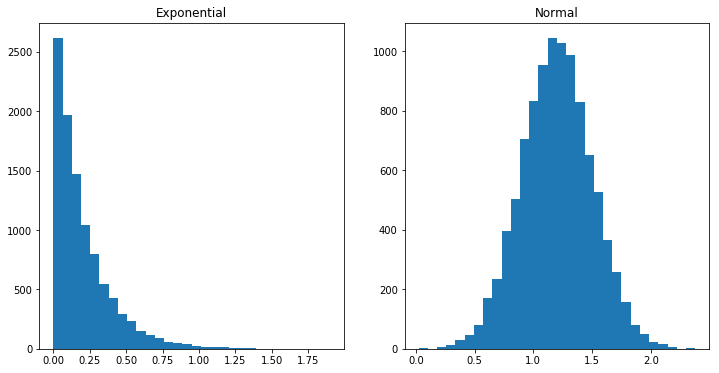

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(returns_exp, bins=30)
plt.title('Exponential')
plt.subplot(122)
plt.hist(returns, bins=30)
plt.title('Normal')
plt.show()

In [7]:
print('Test stat: ', stats.shapiro(returns_exp)[0], 
      'p value: ', stats.shapiro(returns_exp)[1])

Test stat:  0.8156617879867554 p value:  0.0


Compare and contrast. This case, the P-value is < 0.05, and so there is enough evidence to reject the null hypothesis of the distribution being normal.

Now let's check the normality of real distributions

In [8]:
import quandl
import datetime
quandl.ApiConfig.api_key = ""

end = datetime.datetime.now()
start = end - datetime.timedelta(365*5)

AAPL = quandl.get('EOD/AAPL', start_date=start, end_date=end)

AAPLreturns = (AAPL['Close']/AAPL['Close'].shift(1))-1

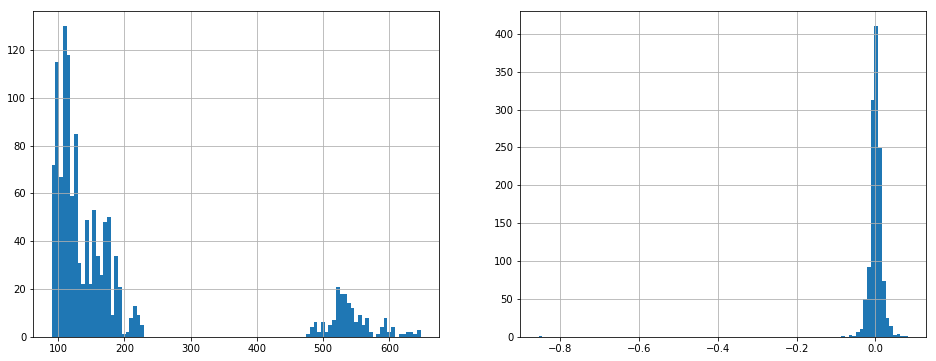

In [9]:
# Let's plot the distribution of prices and returns
plt.figure(figsize=(16,6))
plt.subplot(121)
AAPL['Close'].hist(bins=100, label='AAPL_Prices')
plt.subplot(122)
AAPLreturns.hist(bins=100, label='AAPL_Returns')
plt.show()

Price levels are obviously not normal, but returns look close 

In [10]:
AAPL_array = np.array(AAPL['Close'])
print('AAPL Prices\nTest statistic: ', stats.shapiro(AAPL_array)[0], 
      '\nP-value: ', stats.shapiro(AAPL_array)[1])

AAPL Prices
Test statistic:  0.6068973541259766 
P-value:  0.0


In [11]:
AAPLreturns_array = np.array(AAPLreturns.dropna())
print('AAPL Returns\nTest statistic: ', stats.shapiro(AAPLreturns_array)[0], 
      '\nP-value: ', stats.shapiro(AAPLreturns_array)[1])

AAPL Returns
Test statistic:  0.3324963450431824 
P-value:  0.0


Looks like neither are normal since the p-value is < 5%

Another test - Anderson Darling

In [12]:
print('Anderson Darling test')
print('Stats for normal distribution\n', stats.anderson(returns))
print('\n')
print('Stats for exp distribution\n', stats.anderson(returns_exp))
print('\n')
print('Stats for AAPL Returns\'s distribution\n', stats.anderson(AAPLreturns_array))

Anderson Darling test
Stats for normal distribution
 AndersonResult(statistic=0.093276307066844311, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Stats for exp distribution
 AndersonResult(statistic=461.96932223869953, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Stats for AAPL Returns's distribution
 AndersonResult(statistic=127.40971068941758, critical_values=array([ 0.574,  0.654,  0.785,  0.915,  1.089]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Here, we have three sets of values: the Anderson-Darling test statistic, a set of critical values, and a set of corresponding confidence levels, such as 15 percent, 10 percent, 5 percent, 2.5 percent, and 1 percent, as shown in the previous output. 

For the normal distribution, if we choose a 1 percent confidence level—the last value of the critical values, we see 1.088. The test statistic of 0.34 is < 1.088, hence the null hypothesis of a normal distribution cannot be rejected.

The converse is true for the exponential distribution and the distribution of AAPL returns, which mean the null hypothesis of normality can be rejected.

The stats.anderson package can test for other distributions too

In [13]:
help(stats.anderson)

Help on function anderson in module scipy.stats.morestats:

anderson(x, dist='norm')
    Anderson-Darling test for data coming from a particular distribution
    
    The Anderson-Darling test is a modification of the Kolmogorov-
    Smirnov test `kstest` for the null hypothesis that a sample is
    drawn from a population that follows a particular distribution.
    For the Anderson-Darling test, the critical values depend on
    which distribution is being tested against.  This function works
    for normal, exponential, logistic, or Gumbel (Extreme Value
    Type I) distributions.
    
    Parameters
    ----------
    x : array_like
        array of sample data
    dist : {'norm','expon','logistic','gumbel','gumbel_l', gumbel_r',
        'extreme1'}, optional
        the type of distribution to test against.  The default is 'norm'
        and 'extreme1', 'gumbel_l' and 'gumbel' are synonyms.
    
    Returns
    -------
    statistic : float
        The Anderson-Darling test statist

** The 4 moments of a distribution **

It's also useful to go beyond the usual mean and standard deviation into the other moments, as they provide us with clues on the normality of a distribution.

Mean:
$$ Mean = \bar R = \frac{\sum_i^n R_i}{n} $$
<hr>
Variance/Standard Deviation:

$$ Variance = (Standard Deviation)^2 = \sigma^2 = \frac{\sum_i^n (R_i-\bar R)^2}{n-1} $$ 
<hr>
Skew (skewed left, skewed right):

$$ Skew = \frac{\sum_i^n (R_i-\bar R)^3}{(n-1)\sigma^3} $$ 
<hr>

Kurtosis/Excess Kurtosis (peakness or fat tails)

$$ Skew = \frac{\sum_i^n (R_i-\bar R)^4}{(n-1)\sigma^4} $$ or
$$ Skew = \frac{\sum_i^n (R_i-\bar R)^4}{(n-1)\sigma^4} - 3 $$ 

The way to do it with libraries is much much simpler than the above

In [14]:
print('\n Mean: ', np.mean(returns), '\n',
     'Standard Deviation: ', np.std(returns), '\n',
     'Skew: ', stats.skew(returns), '\n',
     'Kurtosis', stats.kurtosis(returns))


 Mean:  1.19935920499 
 Standard Deviation:  0.301023661839 
 Skew:  0.0019636977663557873 
 Kurtosis 0.026479272360443673


For a normal distribution, skewness ~ 0.03, kurtosis ~ 3. In this case, the stat being computed is excess kurtosis, so the value is close to 0 instead.

In [19]:
print ('Moments for AAPL Returns')
print('\n Mean: ', np.mean(AAPLreturns_array), '\n',
     'Standard Deviation: ', np.std(AAPLreturns_array), '\n',
     'Skew: ', stats.skew(AAPLreturns_array), '\n',
     'Kurtosis', stats.kurtosis(AAPLreturns_array))

Moments for AAPL Returns

 Mean:  0.000328091673061 
 Standard Deviation:  0.0279855695958 
 Skew:  -22.675005004193835 
 Kurtosis 691.1559815602365


Obviously not normal!

In [22]:
# T tests - test statistic follows a student's t distribution if the null hypothesis is supported
# Recall that the mean of our rets was 1.2
# Let's apply t and p tests on different means

print('\n Mean of 0.2\n', stats.ttest_1samp(returns, 0.2))


 Mean of 0.2
 Ttest_1sampResult(statistic=331.9703274071677, pvalue=0.0)


We reject the null hypothesis since the T-value is huge and the P-value is 0.

In [24]:
print('\n Mean of 1.205\n', stats.ttest_1samp(returns, 1.205))


 Mean of 1.205
 Ttest_1sampResult(statistic=-1.8737772736094489, pvalue=0.060990271728498281)


** Tests of Equal Variances **

In [31]:
# Bartlett test

# Create a normal distribution with std of 0.6
np.random.seed(42)
mean = 1.2
std = 0.6
n = 10000

returns_2 = np.random.normal(mean, std, n)
np.std(returns)

0.30102366183899626

In [32]:
stats.bartlett(returns, returns_2)

BartlettResult(statistic=4462.2016067879904, pvalue=0.0)

stat >> pvalue, so the variances are not equal

In [36]:
np.random.seed(42)
mean = 1.2
std = 0.3000
n = 10000

returns_3 = np.random.normal(mean, std, n)

In [37]:
stats.bartlett(returns, returns_3)

BartlettResult(statistic=0.0, pvalue=1.0)

stat << pvalue, so the variances are equal

** Test seasonality **

Check to see if AAPL's Jan price are statistically different from other months

In [39]:
AAPL_Jan = AAPL[AAPL.index.month==1]['Close']

In [40]:
AAPL_OtherMonths = AAPL[AAPL.index.month!=1]['Close']

In [41]:
stats.ttest_ind(AAPL_Jan, AAPL_OtherMonths)

Ttest_indResult(statistic=1.6139723596905229, pvalue=0.10678460475281105)

From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores (or in this case Jan prices being similar to other months). If the p-value is smaller than a threshold, e.g. 1%, 5% or 10%, then we can reject the null hypothesis of identical average scores (or in this case Jan prices being statistically different to other months). So in this case, we don't have enough evidence of Jan prices being statistically different from that of other months.